# Trabalho Prático


## Grupo 7
#### Filipe Barbosa a77252
#### Hugo Ferreira  a78555

## Descrição

Neste trabalho prático é pretentido descobrir um $s$ tal que $s\equiv N\space mod\space 8$,sendo N o número de grupo atribuido, usando um algoritmo quântico. O algoritmo quântico que vai ser usado é o algoritmo $Grover$.
Os possíveis casos vão ser $000$,$001$,$010$,$011$,$100$,$101$,$110$,$111$.
Como no nosso caso $N=7$, depois de converter para binário vamos ter que o resultado pretendido vai ser $111$.

## Algoritmo de Grover

Para a construção do algoritmo de Grover vamos ter as seguintes etapas:  
 - Inicialização
 - Oráculo
 - Amplificação

### Inicialização

Vamos inicializar os estados do sistema com a mesma amplitude.

$$ \sum_{x_i} \lvert x_i \rangle$$  
  
Esta inicialização é feita através da sobreposição dos $qubits$ aplicando um gate de Hadamard a cada um.

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import *
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

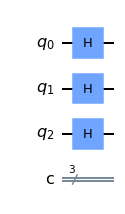

In [2]:
n=3

cr = ClassicalRegister(n, 'c')
qr = QuantumRegister(n, 'q')

qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.draw('mpl')

### Oráculo

Vamos criar o oráculo que vai ser responsável por mudar a fase para o nosso número em binário pretendido.  
Como no nosso caso o número pretendido é o $111$ não vamos precisar aplicar nenhum gate-X e simplesmente vamos aplicar o um gate-CCZ que pode ser construido em $qiskit$ através da sequência gate-H, gate-CCX e gate-H.

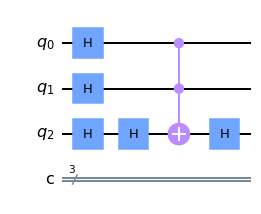

In [3]:
def oracle(circuit,q):
    circuit.h(q[2])
    circuit.ccx(q[0],q[1],q[2])
    circuit.h(q[2])

oracle(qc, qr)
qc.draw(output='mpl')

Através do statevector a seguir representado podemos verificar que o oráculo está a mudar de fase nos qubits pretendidos.

In [4]:
backend_state = Aer.get_backend('statevector_simulator')

In [5]:
result = execute(qc, backend_state).result()
qstate = result.get_statevector(qc)

Como o último elemento da matriz é o que está negativo, e esse elemento representa o 111 temos que o oracle está correto.

In [6]:
qstate

array([ 0.35355339+0.00000000e+00j,  0.35355339+0.00000000e+00j,
        0.35355339+0.00000000e+00j,  0.35355339-4.32978028e-17j,
        0.35355339+0.00000000e+00j,  0.35355339+0.00000000e+00j,
        0.35355339+0.00000000e+00j, -0.35355339+4.32978028e-17j])

Apresentamos em seguida o statevector em forma de gráficos para melhor visualização.

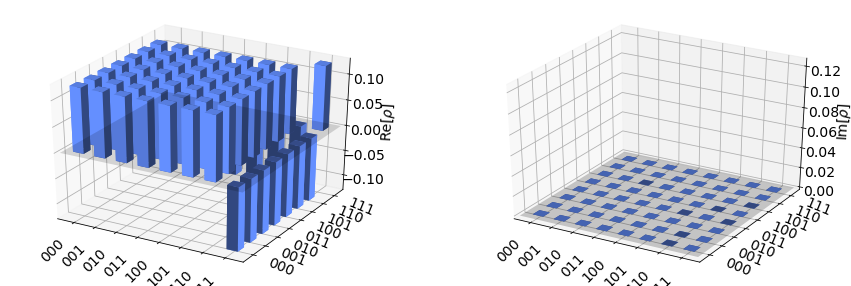

In [7]:
plot_state_city(qstate)

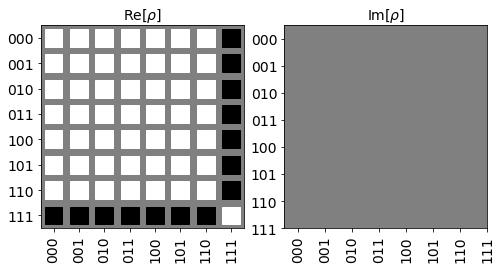

In [8]:
plot_state_hinton(qstate)

### Amplificação

Nesta fase vamos criar um diffuser que nos vai permitir aumentar a amplitude dos qubits de forma a que aumente a probabilidade de obtermos o resultado que pretendemos. Para isso é necessário inverter e aumentar a amplitude da componente pretendidade em torno da média das amplitudes e simultaneamente reduzir das restantes componentes.

In [9]:
def diffuser(circuit,qr):
    circuit.h(qr)
    circuit.x(qr)
    
    circuit.h(qr[2])
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.h(qr[2])
    
    circuit.x(qr)
    circuit.h(qr)
    

Agora vamos criar um $QuantumCircuit$ que vai conter o nosso oráculo e $diffuser$ aproximadamente $\sqrt{2^n}$. O espectável seria fazer 3 iterações, usando $round(m.sqrt(2**n))$, mas obtivemos melhores resultados fazendo duas iterações, por isso usamos $m.floor(m.sqrt(2**n))$.

In [10]:
import math as m

times= m.floor(m.sqrt(2**n))
print(times)

2


Fazemos no fim a medição que consiste na projeção do estado quântico de cada um dos qubits para um bit clássico. Ao ser medido, cada qubit colapsa para um dos estados possíveis, não sendo mais possível obter o estado quântico inicial.

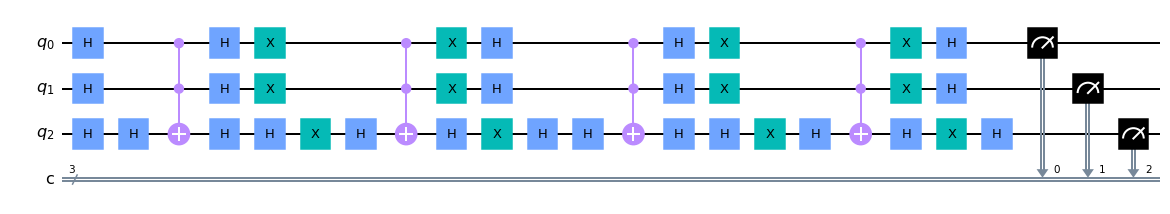

In [11]:
qc_Grover= QuantumCircuit(qr,cr)

qc_Grover.h(qr)

for t in range(times):
    oracle(qc_Grover,qr)
    
    diffuser(qc_Grover,qr)
    
qc_Grover.measure(qr,cr)

qc_Grover.draw(output='mpl')

Temos então que o estado que queremos é o que tem a maior probabilidade.

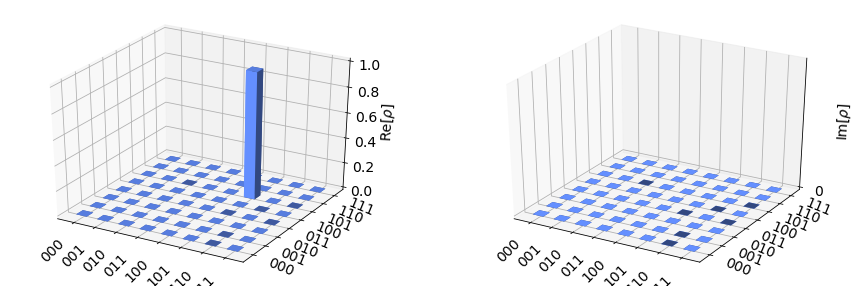

In [12]:
result = execute(qc_Grover, backend_state).result()
qstate = result.get_statevector(qc_Grover)
plot_state_city(qstate)

### Simulação

In [13]:
backend = Aer.get_backend("qasm_simulator")

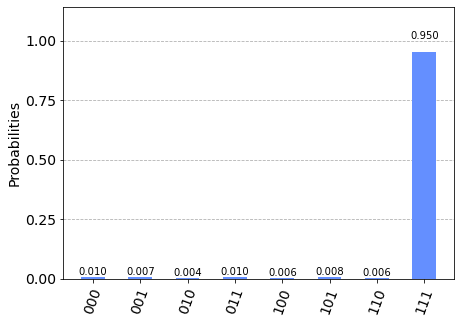

In [14]:
shots=1024
result = execute(qc_Grover, backend, shots=shots).result()
counts_sim = result.get_counts(qc_Grover)
plot_histogram(counts_sim)

In [15]:
qc_Grover.depth()

22

### Simulação com noise

In [16]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [17]:
import qiskit.tools.jupyter

%qiskit_backend_overview

In [18]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 13             Pending Jobs: 14             Pending Jobs: 9
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      163.8          Avg. T1:      80.3           Avg. T1:      75.9
Avg. T2:      68.2           Avg. T2:      71.2           Avg. T2:      75.6



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 3              Pending Jobs: 0              Pending Jobs: 5
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operati

Escolhemos o computador com menos erro.

In [19]:
backend_device = provider.get_backend('ibmq_santiago')
print("Running on: ", backend_device)

Running on:  ibmq_santiago


In [20]:
backend_device

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
backend_monitor(backend_device)

ibmq_santiago
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 0
    backend_version: 1.3.22
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    online_date: 2020-06-03 04:00:00+00:00
    qubit_lo_range: [[4.333429063663208e+18, 5.333429063663208e+18], [4.123616111887707e+18, 5.123616111887708e+18], [4.3205355364195937e+18, 5.320535536419594e+18], [4.2423110151676165e+18, 5.242311015167617e+18], [4.316329983561523e+18, 5.316329983561523e+18]]
    n_uchannels: 8
    meas_kernels: ['hw_qmfk']
    backend_name: ibmq_santiago
    dtm: 0.2222222222222222
    meas_levels: [1, 2]
    input_allowed: ['job']
    meas_map: [[0, 1, 2, 3, 4]]
    rep_times: [0.001]
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformatio

In [22]:
from qiskit.providers.aer.noise import NoiseModel

In [23]:
coupling_map = backend_device.configuration().coupling_map

In [24]:
noise_model = NoiseModel.from_backend(backend_device)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'sx', 'cx', 'reset', 'id', 'x']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('cx', [4, 3]), ('cx', [3, 4]), ('cx', [2, 3]), ('cx', [3, 2]), ('cx', [2, 1]), ('cx', [1, 2]), ('cx', [0, 1]), ('cx', [1, 0]), ('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


In [25]:
basis_gates = noise_model.basis_gates
print(basis_gates)

['cx', 'id', 'reset', 'rz', 'sx', 'x']


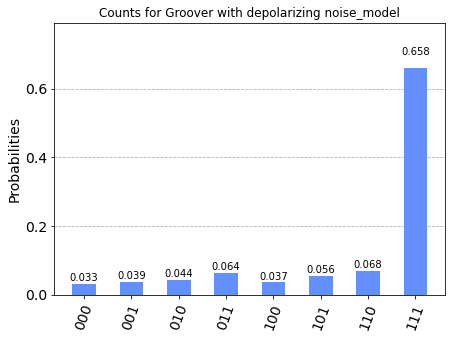

In [26]:
result_noise = execute(qc_Grover, backend,
noise_model=noise_model,
coupling_map=coupling_map,
basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(qc_Grover)
plot_histogram(counts_noise, title="Counts for Groover with depolarizing noise_model")

### Simulação num computador quântico

In [27]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [28]:
job_r = execute(qc_Grover, backend_device, shots=shots)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bcd49cb454d093beaa7409


In [29]:
job_get=backend_device.retrieve_job("60bcd49cb454d093beaa7409")

result_r = job_get.result()
counts_run = result_r.get_counts(qc_Grover)

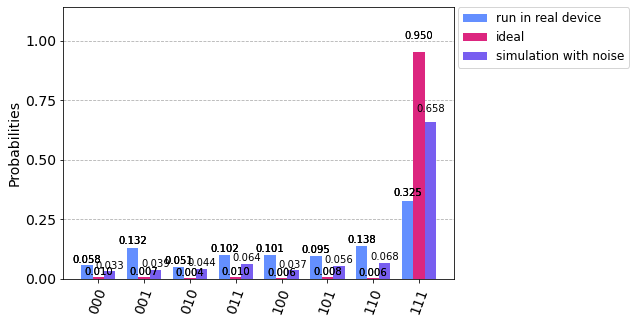

In [30]:
plot_histogram([counts_run, counts_sim, counts_noise ], legend=[ 'run in real device', 'ideal', "simulation with noise"])

### Optimisation

Decidimos fazer uma optimização de nível 3.

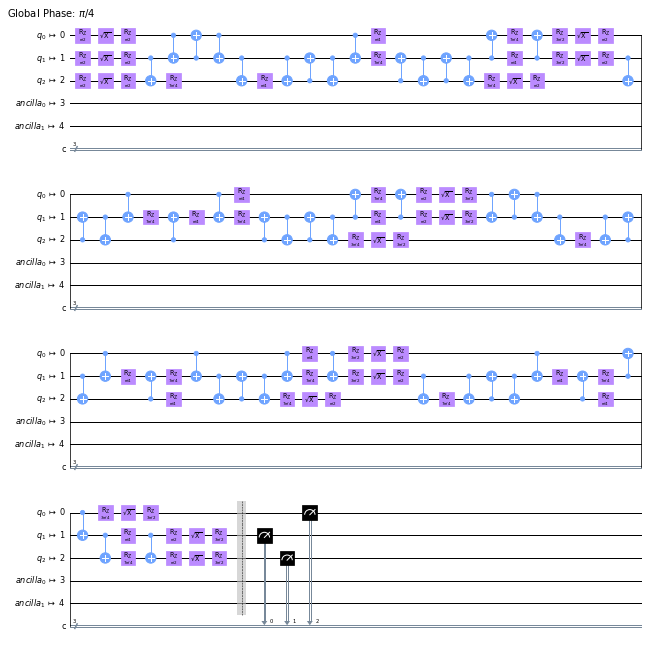

In [31]:
from qiskit.compiler import transpile
qc_t_real = transpile(qc_Grover, backend=backend_device)
qc_t_real.draw(output='mpl', scale=0.5)

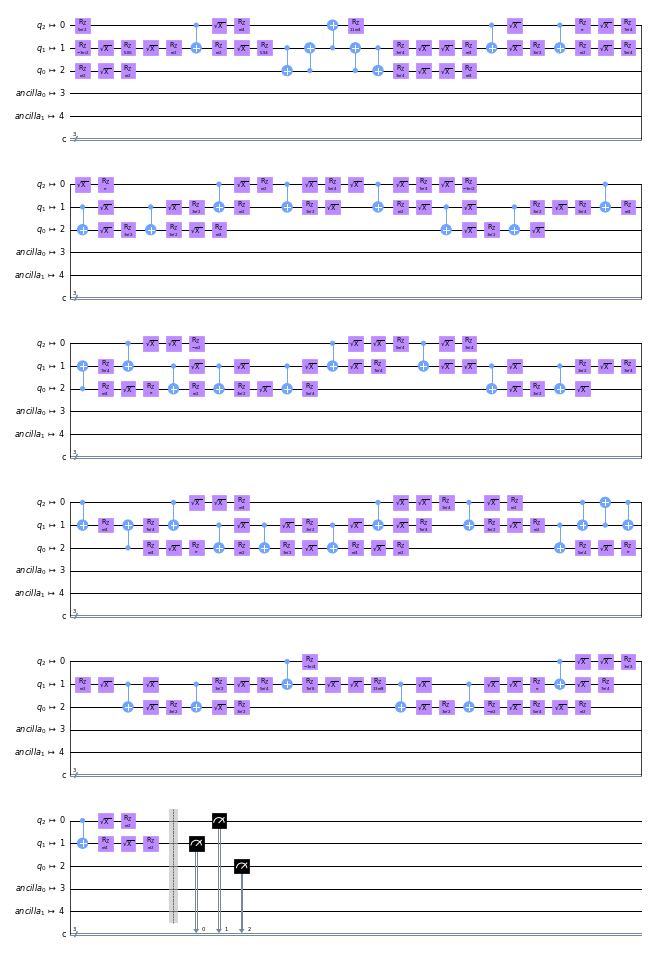

In [32]:
qc_optimized_3 = transpile(qc_Grover, backend=backend_device,optimization_level=3)
qc_optimized_3.draw(output='mpl', scale=0.5)

In [33]:
qc_Grover.depth()

22

In [34]:
qc_t_real.depth()

83

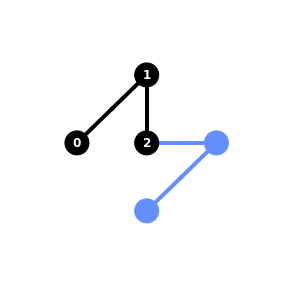

In [35]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t_real, backend_device)

In [36]:
qc_optimized_3.depth()

130

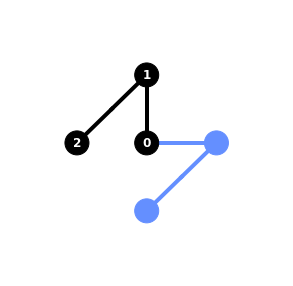

In [37]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_optimized_3, backend_device)

In [38]:
job_exp = execute(qc_optimized_3, backend_device, shots = shots)
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))
job_exp.result().get_counts(qc_optimized_3)

JOB ID: 60bcd4c8fe8ff1433b29f5dd


{'000': 53,
 '001': 62,
 '010': 63,
 '011': 78,
 '100': 66,
 '101': 61,
 '110': 89,
 '111': 552}

In [39]:
job_get_o =backend_device.retrieve_job("60bcd4c8fe8ff1433b29f5dd")
result_opt = job_get_o.result(timeout=3600, wait=5)
counts_opt = result_opt.get_counts(qc_optimized_3)

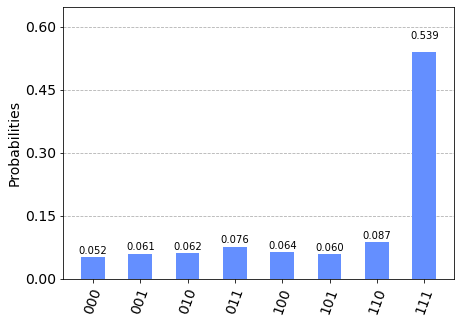

In [40]:
plot_histogram(counts_opt)

### Ignis

Vamos agora usar o Ignis para a mitigação de erros.

In [41]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

Começamos por gerar a lista dos circuitos de calibração de medição.  
Como estamos a medir 3 qubits vamos precisar de $2^3=8$ circuitos de calibração.

In [42]:
qr1 = QuantumRegister(n)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')

In [43]:
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

In [44]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)
jobID_run_ignis = job_ignis.job_id()
print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60bcd50025cc6e360365d32e


In [45]:
job_get=backend_device.retrieve_job("60bcd50025cc6e360365d32e")
cal_results = job_get.result()

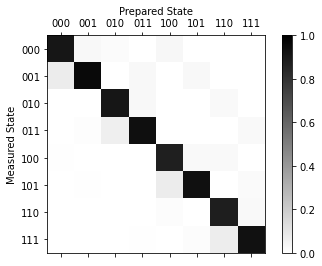

In [46]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
meas_fitter.plot_calibration()

In [47]:
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.917114


In [48]:
meas_filter = meas_fitter.filter
# Results with mitigation
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()


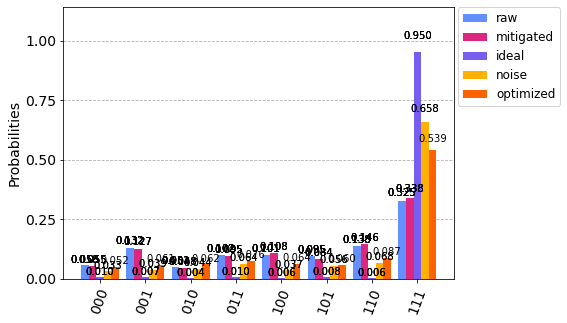

In [49]:
plot_histogram([counts_run, mitigated_counts, counts_sim, counts_noise,counts_opt], legend=['raw', 'mitigated', 'ideal',"noise","optimized"])